<a href="https://colab.research.google.com/github/ambarishreddy/Chatgpt/blob/main/Implement_Analysis_of_X_ray_images_using_Auto_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy tensorflow

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

# Open the video file
cap = cv2.VideoCapture('/content/video.mp4')

In [ ]:
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Perform analysis on 'frame' here

    # Display the frame (optional)
    cv2_imshow( frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
pip install tensorflow scikit-learn matplotlib numpy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the images to 28x28 and add a channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Split the data into training and validation sets
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))


Epoch 1/10
375/375 [==============================] - 58s 150ms/step - loss: 0.2269 - val_loss: 0.1559
Epoch 2/10
375/375 [==============================] - 56s 150ms/step - loss: 0.1439 - val_loss: 0.1351
Epoch 3/10
375/375 [==============================] - 54s 145ms/step - loss: 0.1295 - val_loss: 0.1250
Epoch 4/10
375/375 [==============================] - 55s 146ms/step - loss: 0.1217 - val_loss: 0.1188
Epoch 5/10
375/375 [==============================] - 55s 146ms/step - loss: 0.1166 - val_loss: 0.1148
Epoch 6/10
375/375 [==============================] - 56s 148ms/step - loss: 0.1133 - val_loss: 0.1119
Epoch 7/10
375/375 [==============================] - 54s 144ms/step - loss: 0.1110 - val_loss: 0.1099
Epoch 8/10
375/375 [==============================] - 54s 144ms/step - loss: 0.1091 - val_loss: 0.1084
Epoch 9/10
375/375 [==============================] - 54s 145ms/step - loss: 0.1076 - val_loss: 0.1071
Epoch 10/10
375/375 [==============================] - 54s 144ms/step - l

313/313 [==============================] - 4s 11ms/step


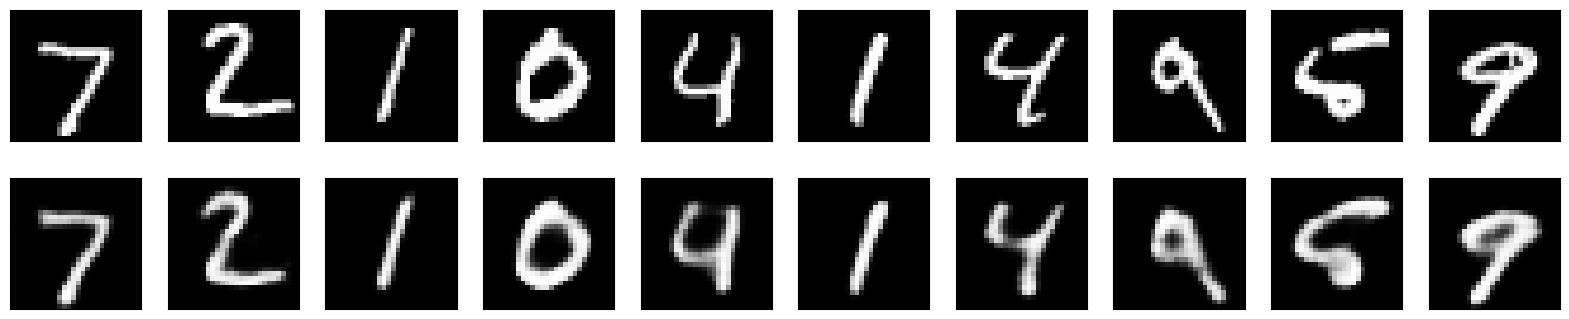

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

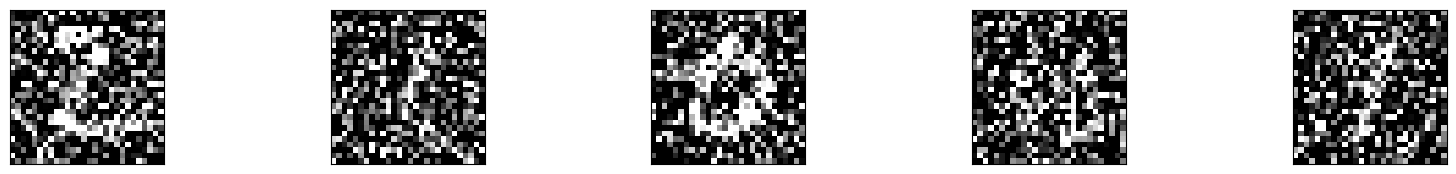

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()